In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, iirnotch
from tqdm import tqdm


# **Ploteo de Señales**

In [ ]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt('/content/ECG_despuesdeactividad.txt')
array2= np.genfromtxt('/content/ECG_hiperventilación.txt')
array3= np.genfromtxt('/content/ECG_reposo.txt')

array1 = array1[:,6]
print("Señal 1 en reposo:",array1)
array2 = array2[:,6]
print("Señal 2 hiperventilacion:",array2)
array3= array3[:,6]
print("Señal 3 despues de actividad:",array3)



Señal 1 en reposo: [480. 479. 482. ... 602. 608. 615.]
Señal 2 hiperventilacion: [504. 498. 497. ... 505. 495. 485.]
Señal 3 despues de actividad: [489. 479. 473. ... 615. 606. 591.]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


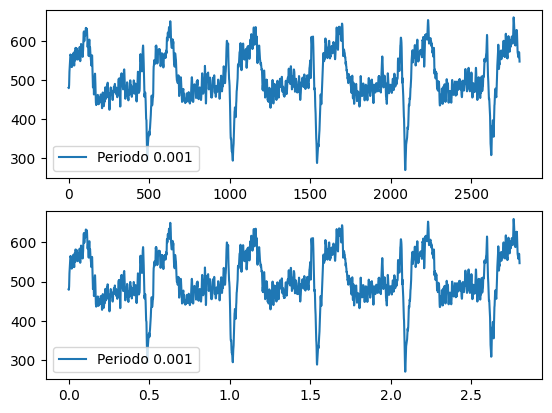

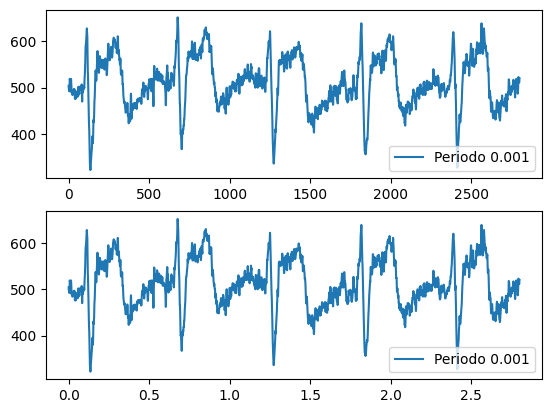

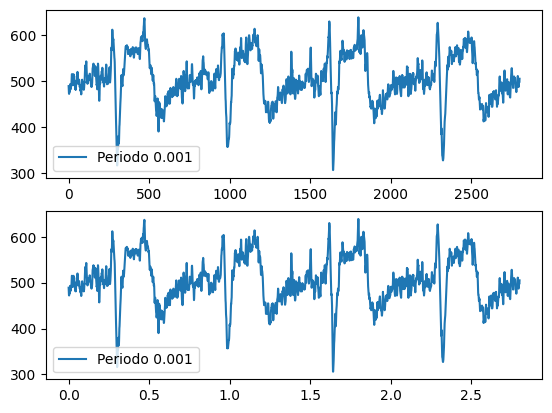

In [ ]:
Fs=1000; #Frecuencia de muestreo
T1=1/Fs
array1=array1[0:2800]
array2=array2[0:2800]
array3=array3[0:2800]
#Los elementos ahora son los mismos para todas las señales
M = len(array1)
n = np.arange(0,M)

t = n/Fs

#Señal en reposo , eje de tiempo en seg
fig,axes = plt.subplots(2)
axes[0].plot(n,array1,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,array1,label=f"Periodo {T1}")
axes[1].legend()

#Señal hiperventilacion , eje de tiempo en seg
fig,axes = plt.subplots(2)
axes[0].plot(n,array2,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,array2,label=f"Periodo {T1}")
axes[1].legend()

#Señal despues de hacer ejercicio, eje de tiempo en seg
fig,axes = plt.subplots(2)
axes[0].plot(n,array3,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,array3,label=f"Periodo {T1}")
axes[1].legend()

# **# DFT DE N puntos**

Text(0.5, 1.0, ' Análisis en frecuencia En reposo1')

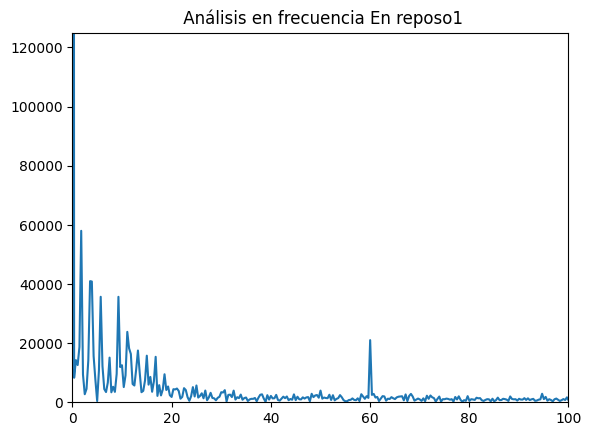

In [ ]:
# Transformada de Fourier
#transformada de fourier FFT
N1 = len(array1)
N2= len(array2)
N3=len(array3)

D1 = np.fft.fft(array1,N1)
D2 = np.fft.fft(array2,N2)
D3 = np.fft.fft(array3,N3)

D1 = D1[0:(N1//2)]
D2 = D2[0:(N2//2)]
D3 = D3[0:(N3//2)]

#magnitud para las cuatro señales en la frecuencia
D1m = np.abs(D1)
D1m = np.round(D1m,3)
D2m = np.abs(D2)
D2m = np.round(D2m,3)
D3m = np.abs(D3)
D3m = np.round(D3m,3)


#frecuencias
F = np.linspace(0, Fs/2, N1//2)

#eje de tiempo en seg
t = n/Fs #Para todos es el mismo tiempo por haber delimitado las señales

plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1")


Text(0.5, 1.0, ' Análisis en frecuencia de Hiperventilacion')

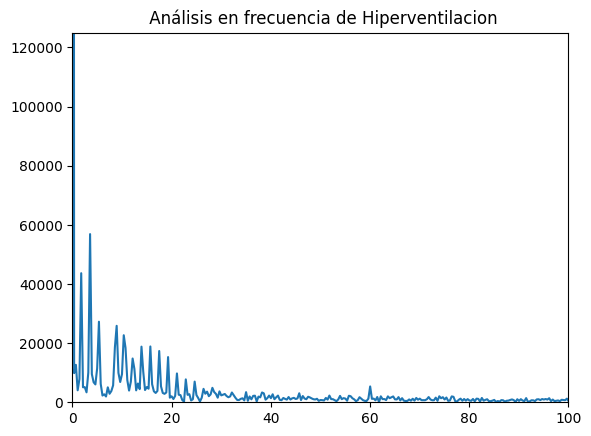

In [ ]:
plt.plot(F,D2m)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de Hiperventilacion")


Text(0.5, 1.0, ' Análisis en frecuencia despues de Actividad Fisica')

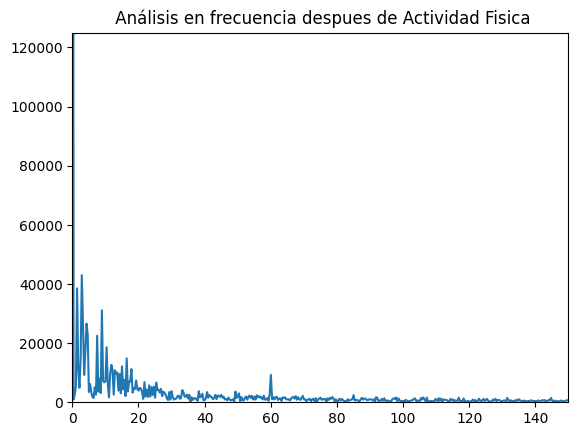

In [ ]:
plt.plot(F,D3m)
plt.xlim([0,150])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia despues de Actividad Fisica")

# **Diseño y aplicacion del filtro Notch**





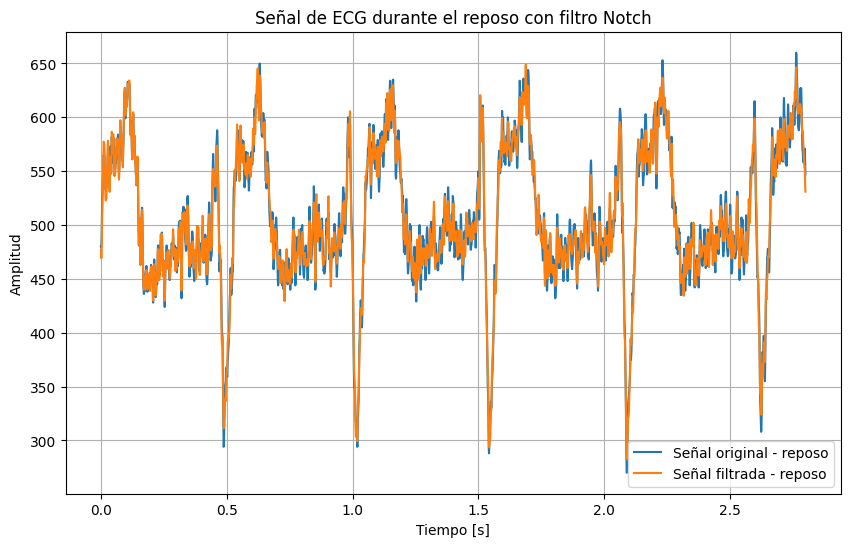

In [ ]:
f_interferencia = 60  # Supongamos que la interferencia está a 60 Hz

# Crea el filtro Notch
Q = 30  # Factor de calidad
bw = f_interferencia / Q  # Ancho de banda del filtro Notch
f0 = f_interferencia  # Frecuencia central del filtro Notch
nyquist = 0.5 * 1000  # Frecuencia de Nyquist
w0 = f0 / nyquist  # Frecuencia normalizada
b, a = iirnotch(w0, Q)

# Aplica el filtro Notch a la señal de ECG
ecg_reposo_filtrada = lfilter(b, a, array1)
ecg_hiperventilacion_filtrada = lfilter(b, a, array2)
ecg_despuesdeactividad_filtrada = lfilter(b, a, array3)

# Visualiza la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t, array1, label='Señal original - reposo')
plt.plot(t, ecg_reposo_filtrada, label='Señal filtrada - reposo')
plt.title('Señal de ECG durante el reposo con filtro Notch')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


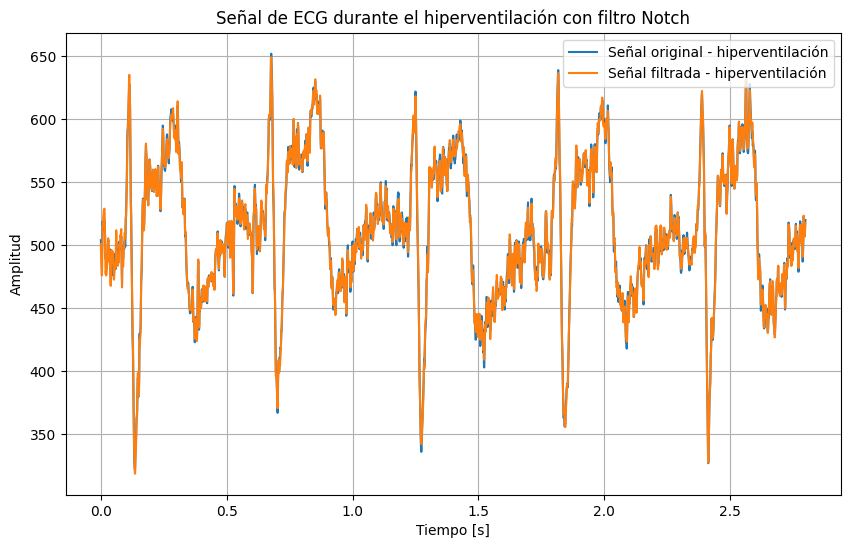

In [ ]:
# Visualiza la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t, array2, label='Señal original - hiperventilación')
plt.plot(t, ecg_hiperventilacion_filtrada, label='Señal filtrada - hiperventilación')
plt.title('Señal de ECG durante el hiperventilación con filtro Notch')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

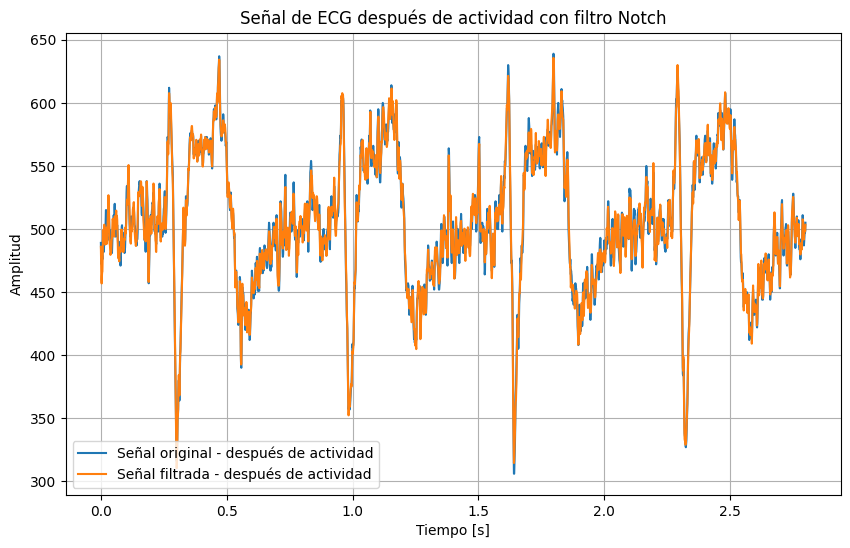

In [ ]:
# Visualiza la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t, array3, label='Señal original - después de actividad')
plt.plot(t, ecg_despuesdeactividad_filtrada, label='Señal filtrada - después de actividad')
plt.title('Señal de ECG después de actividad con filtro Notch')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, ' Análisis en frecuencia de la señal filtrada - reposo')

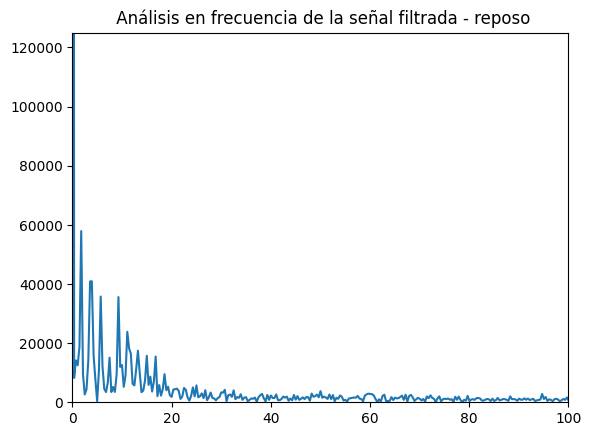

In [ ]:
N1_f = len(ecg_reposo_filtrada)
N2_f= len(ecg_hiperventilacion_filtrada)
N3_f=len(ecg_despuesdeactividad_filtrada)

D1_f = np.fft.fft(ecg_reposo_filtrada,N1_f)
D2_f = np.fft.fft(ecg_hiperventilacion_filtrada,N2_f)
D3_f = np.fft.fft(ecg_despuesdeactividad_filtrada,N3_f)

D1_f = D1_f[0:(N1_f//2)]
D2_f = D2_f[0:(N2_f//2)]
D3_f = D3_f[0:(N3_f//2)]

#magnitud para las cuatro señales en la frecuencia
D1m_f = np.abs(D1_f)
D1m_f = np.round(D1m_f,3)
D2m_f = np.abs(D2_f)
D2m_f = np.round(D2m_f,3)
D3m_f = np.abs(D3_f)
D3m_f = np.round(D3m_f,3)

M_f = len(ecg_reposo_filtrada)
n_f = np.arange(0,M_f)

#frecuencias
F_f = np.linspace(0, Fs/2, N1_f//2)

#eje de tiempo en seg
t = n_f/Fs #Para todos es el mismo tiempo por haber delimitado las señales

plt.plot(F_f,D1m_f)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal filtrada - reposo")

Text(0.5, 1.0, ' Análisis en frecuencia de la señal filtrada - hiperventilación')

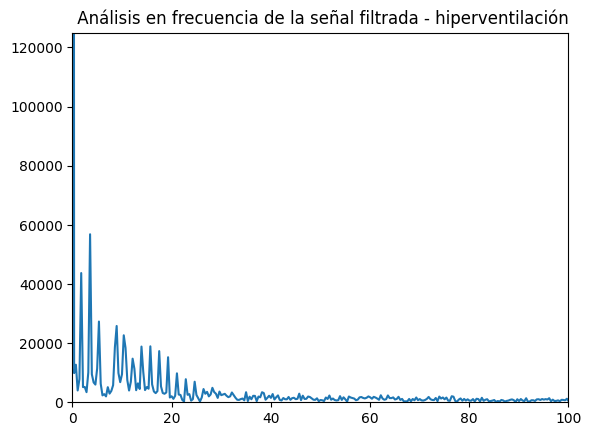

In [ ]:
plt.plot(F_f,D2m_f)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal filtrada - hiperventilación")

Text(0.5, 1.0, ' Análisis en frecuencia de la señal filtrada - después de actividad física')

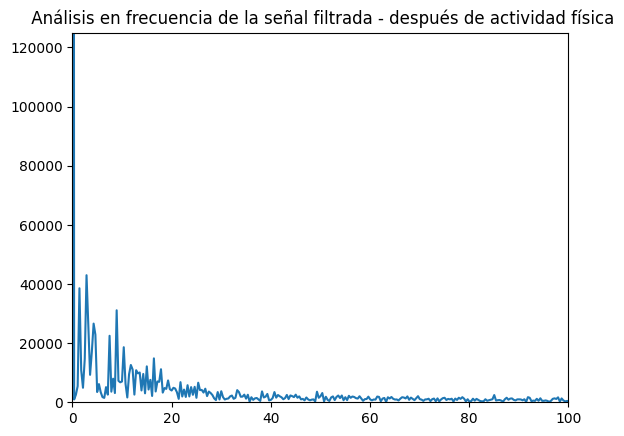

In [ ]:
plt.plot(F_f,D3m_f)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia de la señal filtrada - después de actividad física")

# **#Diseño de filtro FIR - Hamming**





Text(0.5, 1.0, 'Filtro Hamming para la realización del corte en frecuencias altas')

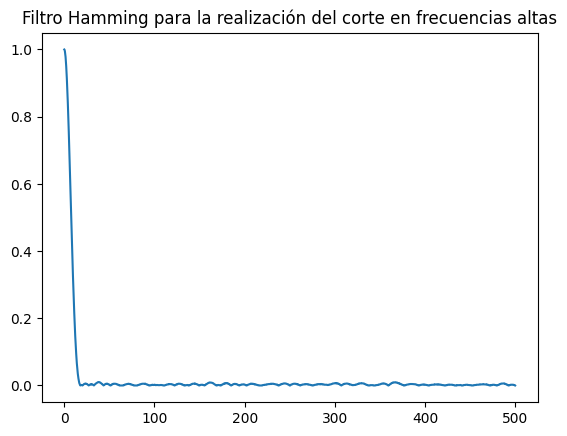

In [ ]:
# Longitud de la ventana
M=120
# Frecuencia de corte de Hz
Fc = 2 # valor seleccionado por la imagen dada

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=Fs)
w = np.round(w,3)

nm = np.arange(M)
W = np.fft.fft(w,N1)
W = np.round(W[0:N1//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N1//2])
Ry = np.linspace(0,1,N1//2)

Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.figure()
plt.plot(F,Wm)
plt.title("Filtro Hamming para la realización del corte en frecuencias altas")




# **Aplicación del filtro FIR - Hamming**



In [ ]:
#Aplicacion de los filtros con la señal original en el tiempo para realizar la convolución de las señales
y1 = lfilter(w, np.array(1),ecg_reposo_filtrada)
y2 = lfilter(w, np.array(1),ecg_hiperventilacion_filtrada)
y3 = lfilter(w, np.array(1),ecg_despuesdeactividad_filtrada)

#Una vez realizada la convolución de las señales en el tiempo se realiza la DFT con el comando FFT para evaluar la salida filtrada por el
#pasabajos.
Y1 = np.fft.fft(y1,N1)
Y1 = np.round(Y1[0:N1//2],3)
Y2 = np.fft.fft(y2,N1)
Y2 = np.round(Y2[0:N1//2],3)
Y3 = np.fft.fft(y3,N1)
Y3 = np.round(Y3[0:N1//2],3)

Ym1 = np.abs(Y1)
Ym2 = np.abs(Y2)
Ym3 = np.abs(Y3)


Text(0.5, 1.0, ' Análisis en frecuencia En reposo1 realizado el corte')

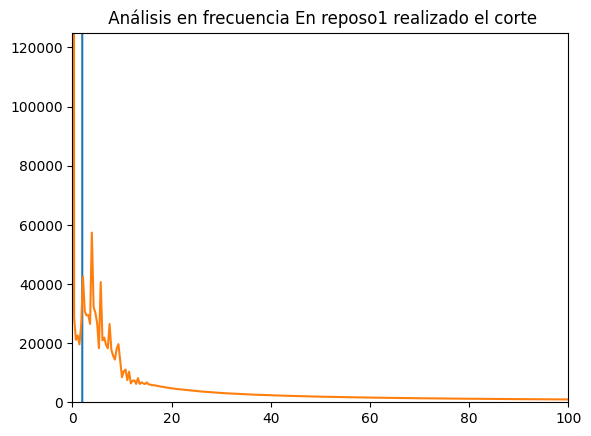

In [ ]:
Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,Ym1)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1 realizado el corte")

Text(0.5, 1.0, ' Análisis en frecuencia hiperventilación')

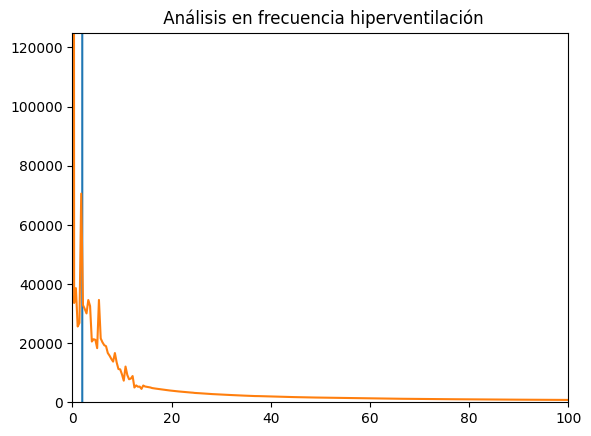

In [ ]:
plt.plot(Rx,Ry)
plt.plot(F,Ym2)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia hiperventilación")


Text(0.5, 1.0, ' Análisis en frecuencia después de la actividad ')

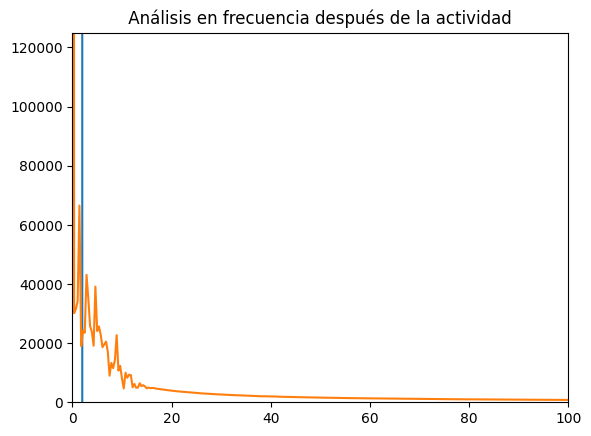

In [ ]:
plt.plot(Rx,Ry)
plt.plot(F,Ym3)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia después de la actividad ")

Text(0.5, 1.0, ' Análisis en tiempo En reposo1 realizado el corte')

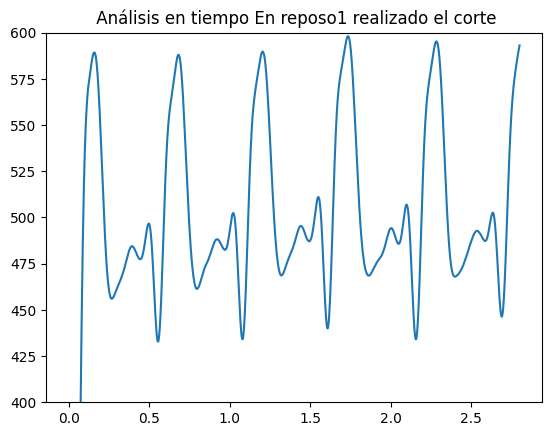

In [ ]:
plt.plot(t,y1)
plt.ylim([400,600])
plt.title(" Análisis en tiempo En reposo1 realizado el corte")

Text(0.5, 1.0, ' Análisis en tiempo de la señal hiperventilacion')

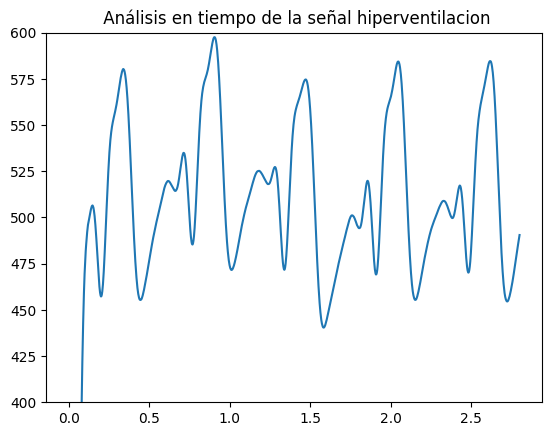

In [ ]:

plt.plot(t,y2)
plt.ylim([400,600])
plt.title(" Análisis en tiempo de la señal hiperventilacion")

Text(0.5, 1.0, ' Análisis en tiempo de la señal despues de la actividad')

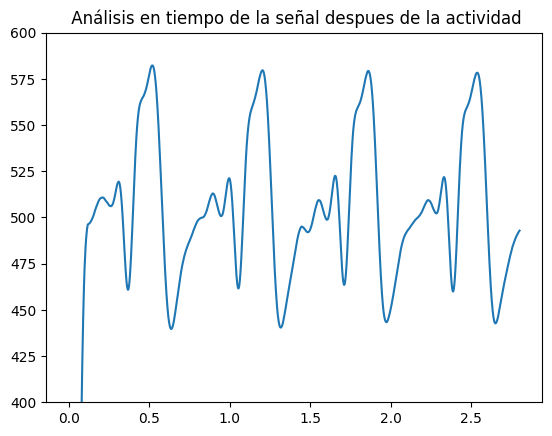

In [ ]:
plt.plot(t,y3)
plt.ylim([400,600])
plt.title(" Análisis en tiempo de la señal despues de la actividad")

# **# Diseño de filtro FIR Ventana**

Text(0.5, 1.0, 'Filtro Ventana para la realización del corte en frecuencias altas')

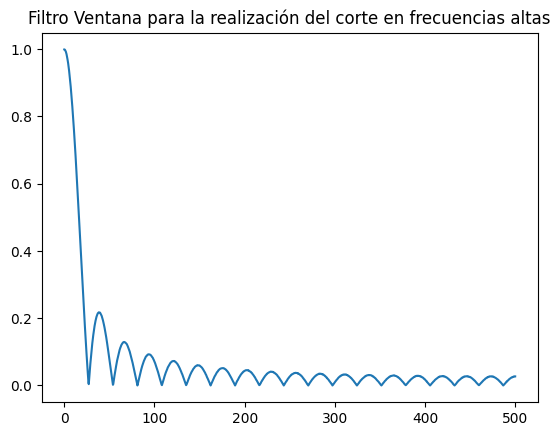

In [ ]:
#longitud de la ventana
M = 37
#frecuencia de corte en Hz
Fc = 2

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='boxcar', fs=Fs)
w = np.round(w,3)

nm = np.arange(M)
W = np.fft.fft(w,N1)
W = np.round(W[0:N1//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N1//2])
Ry = np.linspace(0,1,N1//2)

Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.figure()
plt.plot(F,Wm)
plt.title("Filtro Ventana para la realización del corte en frecuencias altas")

# **Aplicación del filtro FIR - Ventana**

Text(0.5, 1.0, ' Análisis en frecuencia En reposo1 realizado el corte')

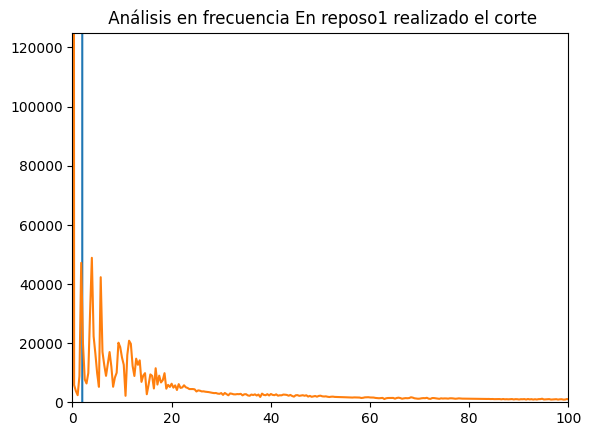

In [ ]:
#Aplicacion de los filtros con la señal original en el tiempo para realizar la convolución de las señales
y1_ventana = lfilter(w, np.array(1),ecg_reposo_filtrada)
y2_ventana = lfilter(w, np.array(1),ecg_hiperventilacion_filtrada)
y3_ventana = lfilter(w, np.array(1),ecg_despuesdeactividad_filtrada)

#Una vez realizada la convolución de las señales en el tiempo se realiza la DFT con el comando FFT para evaluar la salida filtrada por el
#pasabajos.
Y1_ventana = np.fft.fft(y1_ventana,N1)
Y1_ventana = np.round(Y1_ventana[0:N1//2],3)
Y2_ventana = np.fft.fft(y2_ventana,N1)
Y2_ventana = np.round(Y2_ventana[0:N1//2],3)
Y3_ventana = np.fft.fft(y3_ventana,N1)
Y3_ventana = np.round(Y3_ventana[0:N1//2],3)

Ym1_ventana = np.abs(Y1_ventana)
Ym2_ventana = np.abs(Y2_ventana)
Ym3_ventana = np.abs(Y3_ventana)


Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,Ym1_ventana)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia En reposo1 realizado el corte")


Text(0.5, 1.0, ' Análisis en frecuencia hiperventilación')

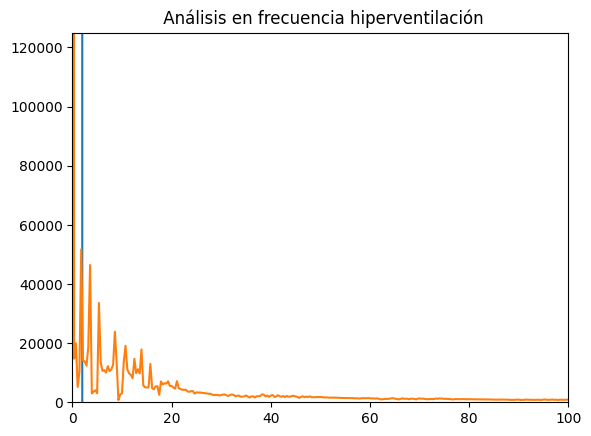

In [ ]:
plt.plot(Rx,Ry)
plt.plot(F,Ym2_ventana)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia hiperventilación")


Text(0.5, 1.0, ' Análisis en frecuencia despues de la actividad')

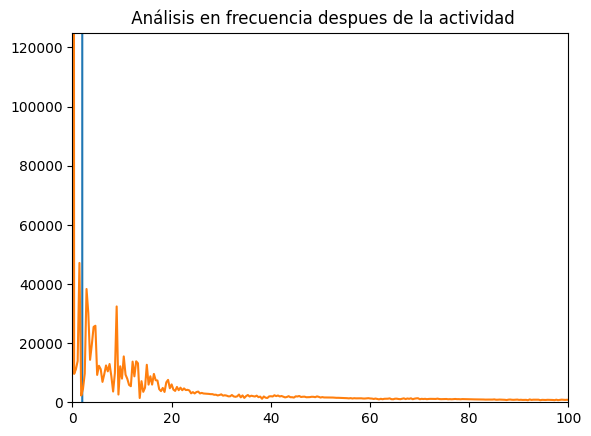

In [ ]:
plt.plot(Rx,Ry)
plt.plot(F,Ym3_ventana)
plt.xlim([0,100])
plt.ylim([0,0.125*1e6])
plt.title(" Análisis en frecuencia despues de la actividad")

Text(0.5, 1.0, ' Análisis en tiempo En reposo1 realizado el corte')

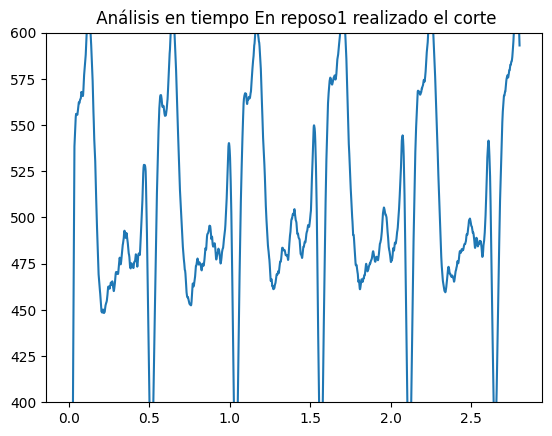

In [ ]:
plt.plot(t,y1_ventana)
plt.ylim([400,600])
plt.title(" Análisis en tiempo En reposo1 realizado el corte")

Text(0.5, 1.0, ' Análisis en tiempo en hiperventilación realizado el corte')

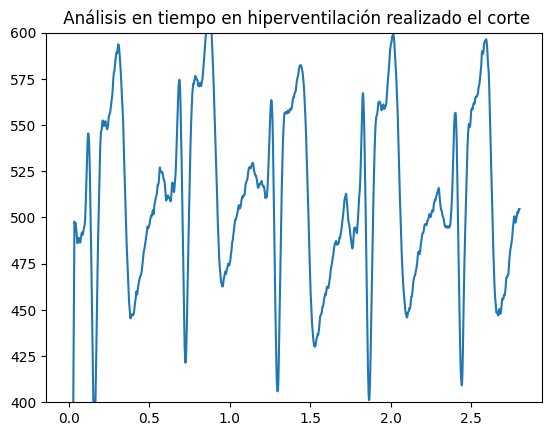

In [ ]:
plt.plot(t,y2_ventana)
plt.ylim([400,600])
plt.title(" Análisis en tiempo en hiperventilación realizado el corte")

Text(0.5, 1.0, ' Análisis en tiempo despues de hacer ejercicio realizado el corte')

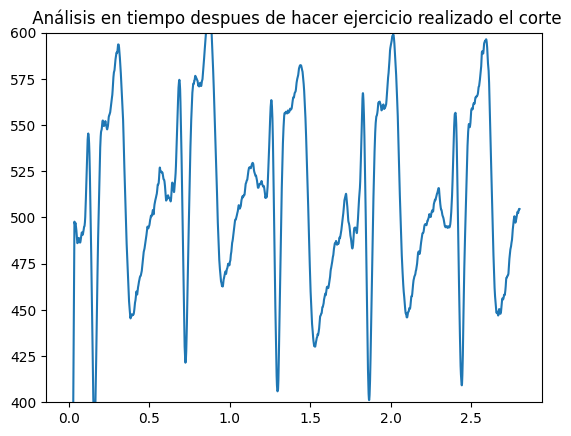

In [ ]:
plt.plot(t,y2_ventana)
plt.ylim([400,600])
plt.title(" Análisis en tiempo despues de hacer ejercicio realizado el corte")